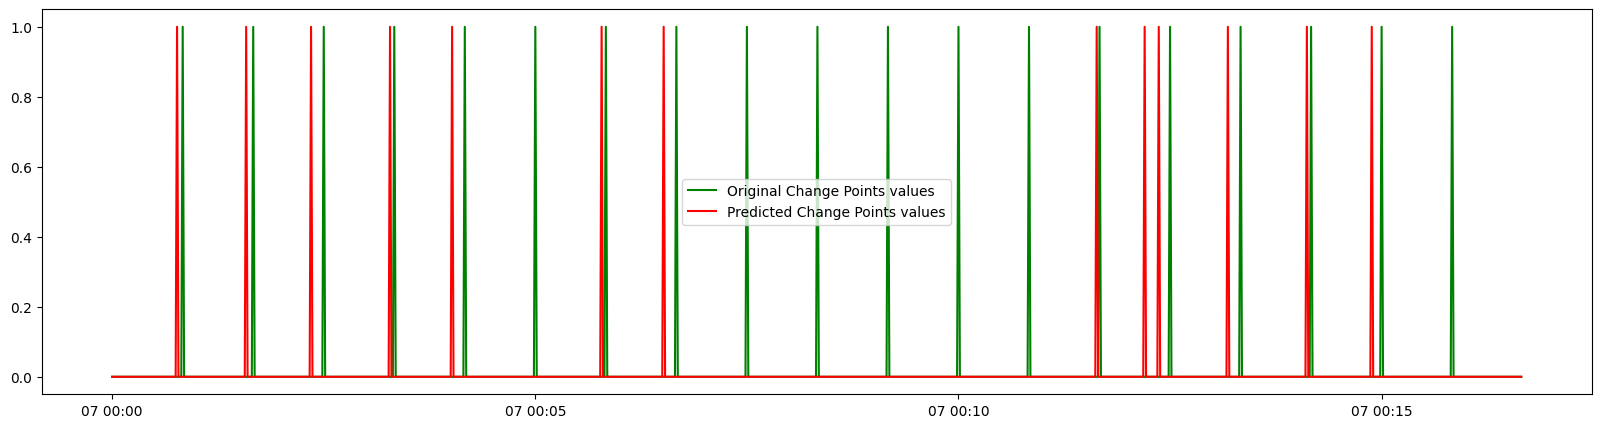

In [7]:
import sys
sys.path.append("../..")

from models.SubspaceBased import SingularSequenceTransformer
from data.SythData import SinusoidWaves
from utils.Reports import SummaryReport
import matplotlib.pyplot as plt

# init df
data = SinusoidWaves(length_data=1000,
                     cps_number=20,
                     white_noise_level="min").get()

# extract target array
target_array = data['x'].values

#define some hyperparameters apriori.
model = SingularSequenceTransformer(
        queue_window=10,
        n_components=2,
        is_fast_parameter_selection=True,
        threshold_quantile_coeff=0.95).fit(x_train=list(target_array), y_train=None)

# predict change points at target_array
cps_pred = model.predict(target_array=target_array)

# save all results at one dataframe
data['cps_pred'] = cps_pred

# plot results
plt.figure(figsize=(20, 5))
plt.plot(data['CPs'], label='Original Change Points values', color='green')
plt.plot(data['cps_pred'], label='Predicted Change Points values', color='red')
plt.legend()

# get scores based on initial dataframe and model results
df_summary_report = SummaryReport().create_report(df=data,
                              column_name_preds="cps_pred",
                              column_name_original="CPs"
                              )

<Axes: xlabel='time'>

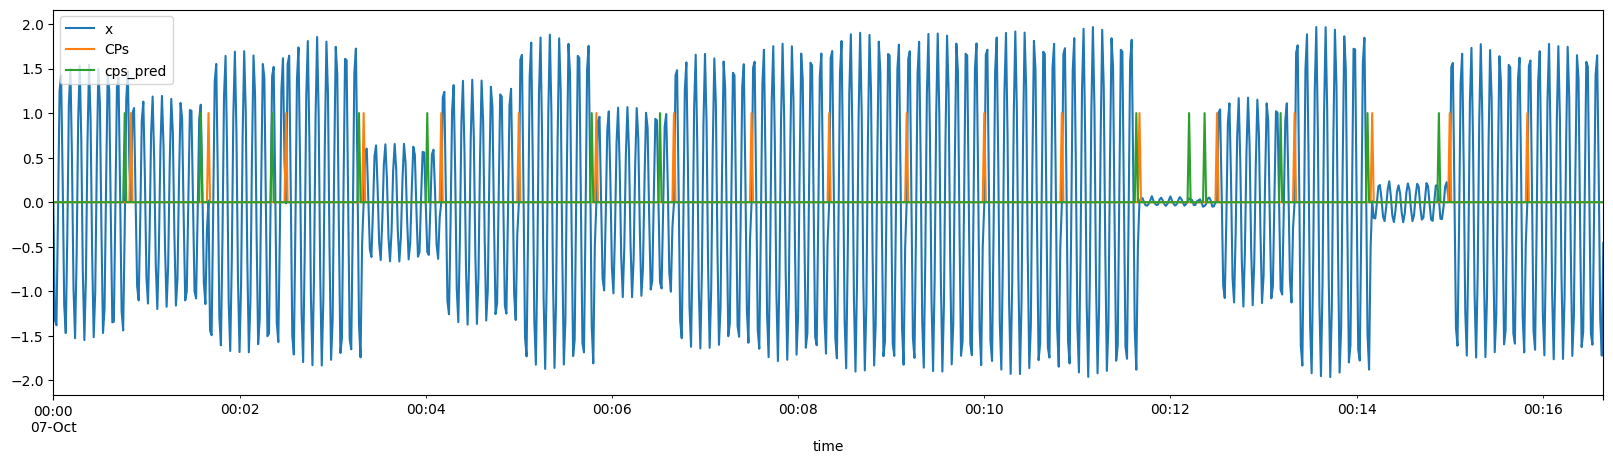

In [9]:
data.plot(figsize=(20,5))